In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.exceptions import DataConversionWarning
import warnings




## features understanding

In this cell, we load a CSV file that contains metadata about the features in our dataset. Each row in the file represents a feature, with information on its name, data type, and description. This will help us understand the structure of the data we’ll be working with.

- **File Path**: `../cybersecurity/NUSW-NB15_features.csv`
- **Encoding**: ISO-8859-1 to handle special characters
- **DataFrame**: Displayed to give an overview of the features in the dataset

In [62]:
features = pd.read_csv("../cybersecurity/NUSW-NB15_features.csv", encoding='ISO-8859-1')
features


,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


## concatinate datasets not obtain a global one

In this cell, we load multiple CSV files that contain network traffic data and combine them into a single DataFrame. The files are named in a sequence (e.g., `UNSW-NB15_1.csv` to `UNSW-NB15_4.csv`), so we use a loop to read each one and concatenate them.

- **Data Files**: `../cybersecurity/UNSW-NB15_{index}.csv` (where `index` ranges from 1 to 4)
- **Parameters**:
  - `low_memory=False` to optimize memory usage during loading.
  - `names=features['Name']` to use the feature names from the metadata file.
  - `ignore_index=True` to reset the row indices after concatenation.
- **Output**: Displays the first 5 rows of the combined DataFrame.

In [63]:
df = pd.concat([pd.read_csv(f"../cybersecurity/UNSW-NB15_{index}.csv", low_memory=False, names=features['Name']) for index in range(1,5)] , ignore_index=True)
df.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,NaN,0


In [64]:
print("dataset shape: ",df.shape)

dataset shape:  (2540047, 49)


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2540047 entries, 0 to 2540046
Data columns (total 49 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             object 
 2   dstip             object 
 3   dsport            object 
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   sbytes            int64  
 8   dbytes            int64  
 9   sttl              int64  
 10  dttl              int64  
 11  sloss             int64  
 12  dloss             int64  
 13  service           object 
 14  Sload             float64
 15  Dload             float64
 16  Spkts             int64  
 17  Dpkts             int64  
 18  swin              int64  
 19  dwin              int64  
 20  stcpb             int64  
 21  dtcpb             int64  
 22  smeansz           int64  
 23  dmeansz           int64  
 24  trans_depth       int64  
 25  res_bdy_len       int64  
 26  Sjit          

### Identify and Count Numerical and Categorical Columns

In this cell, we determine the data type of each column in the DataFrame and count how many columns are numerical versus categorical. This information will help us understand the structure of our data and prepare it for further analysis.

- **Steps**:
  - Identify each column's data type.
  - Count the number of numerical and categorical columns.
- **Output**: Displays the counts of numerical and categorical columns.

In [66]:
column_data_types = df.dtypes

numerical_count = 0
categorical_count = 0

for column_name, data_type in column_data_types.items():
    if np.issubdtype(data_type, np.number):
        numerical_count += 1
    else:
        categorical_count += 1

print(f"There are {numerical_count} Numerical Columns in dataset")
print(f"There are {categorical_count} Categorical Columns in dataset")

There are 40 Numerical Columns in dataset
There are 9 Categorical Columns in dataset


### Check for and Remove Duplicate Rows

In this cell, we identify any duplicate rows in the DataFrame and remove them to ensure that each row represents a unique record. This step is important for data cleaning, as duplicate records can affect the accuracy of our analysis.

- **Steps**:
  - Count the number of duplicate rows.
  - Remove all duplicate rows from the DataFrame.
- **Output**: Displays the count of duplicate rows before removal.

In [67]:
print("Duplicates in train_df: ",df.duplicated().sum())

Duplicates in train_df:  480632


In [68]:
df = df.drop_duplicates()

### Handle Missing Values and Data Preprocessing

In this cell, we handle missing values (`NaN`) in the dataset by replacing them with appropriate default values based on domain knowledge. Additionally, we clean and standardize certain categorical columns.

- **Steps**:
  1. Replace missing values in the `attack_cat` column with `'normal'` to indicate that no attack occurred.
  2. Clean the `attack_cat` column by stripping spaces and converting text to lowercase.
  3. Replace missing values in `ct_flw_http_mthd` with `0`, as it indicates the absence of HTTP method flows.
  4. Replace missing values in `is_ftp_login` with `0`, as it represents whether a user has logged in (binary: 0 or 1).

- **Output**: The missing values in the specified columns are filled with appropriate replacements.

In [69]:
df['attack_cat'].fillna('normal',inplace = True)
df['attack_cat'] = df['attack_cat'].apply(lambda x: x.strip().lower())

df['ct_flw_http_mthd'].fillna(0, inplace=True)

df['is_ftp_login'].fillna(0, inplace=True)

C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\2388371547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['attack_cat'].fillna('normal',inplace = True)
C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\2388371547.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### Identify and Calculate Missing Values

In this cell, we analyze the DataFrame to find columns with missing values. We calculate both the total number of missing values and the percentage of missing values for each column. This information helps us decide how to handle missing data in the dataset.

- **Steps**:
  - Count the total missing values in each column.
  - Calculate the percentage of missing values in each column.
- **Output**: Displays a summary table with missing values per column and their respective percentages.

In [70]:
missing_data = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_data["% of Missing Values"] = round((missing_data["Total No. of Missing Values"]/len(df))*100,2)
missing_data

,Total No. of Missing Values,% of Missing Values
srcip,0,0.0
sport,0,0.0
dstip,0,0.0
dsport,0,0.0
proto,0,0.0
state,0,0.0
dur,0,0.0
sbytes,0,0.0
dbytes,0,0.0
sttl,0,0.0


### Statistical Summary of the Dataset

In this cell, we generate a statistical summary for the numerical columns in the dataset. This summary includes key statistics like mean, standard deviation, minimum, and maximum values, along with the quartiles (25%, 50%, and 75%). The results are then rounded to two decimal places for readability.

- **Steps**:
  - Use `df.describe()` to generate descriptive statistics for numerical columns.
  - Transpose the result using `.T` to swap rows and columns for better readability.
  - Round the values to two decimal places for cleaner presentation.

- **Output**: A summary table showing statistical details of each numerical column.

In [71]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
dur,2059415.0,6.500000e-01,1.104000e+01,0.000000e+00,0.000000e+00,3.000000e-02,3.300000e-01,8.786640e+03
sbytes,2059415.0,5.098050e+03,6.213724e+04,0.000000e+00,4.240000e+02,1.684000e+03,3.728000e+03,1.435577e+07
dbytes,2059415.0,4.192621e+04,1.698575e+05,0.000000e+00,3.040000e+02,3.080000e+03,1.991800e+04,1.465753e+07
sttl,2059415.0,4.360000e+01,5.052000e+01,0.000000e+00,3.100000e+01,3.100000e+01,3.100000e+01,2.550000e+02
dttl,2059415.0,3.650000e+01,4.370000e+01,0.000000e+00,2.900000e+01,2.900000e+01,2.900000e+01,2.540000e+02
sloss,2059415.0,6.110000e+00,2.458000e+01,0.000000e+00,0.000000e+00,4.000000e+00,7.000000e+00,5.319000e+03
dloss,2059415.0,1.893000e+01,5.953000e+01,0.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,5.507000e+03
Sload,2059415.0,9.066677e+06,7.363600e+07,0.000000e+00,8.077689e+04,5.407408e+05,1.095755e+06,5.988000e+09
Dload,2059415.0,2.954297e+06,4.480341e+06,0.000000e+00,7.632194e+04,6.691802e+05,3.835414e+06,1.287619e+08
Spkts,2059415.0,3.865000e+01,8.047000e+01,0.000000e+00,4.000000e+00,1.600000e+01,4.800000e+01,1.064600e+04


### Summary of Categorical Columns in the Dataset

This cell generates a summary of the categorical (object) columns in the dataset. The summary includes statistics like the number of unique values, the most frequent value, and the frequency of that value.

- **Steps**:
  - Use `df.describe(include="O")` to generate descriptive statistics for object (categorical) columns.
  - Transpose the result using `.T` for better readability.

- **Output**: A summary table showing statistics for categorical columns such as the number of unique categories, the most frequent category, and its frequency.

In [72]:
cols = df.columns

for column in cols:
    print('Unique values of ',column , 'with dtype',df[column].dtype, 'have total values',df[column].nunique(),'->',  df[column].unique())
    print('-'*94)

Unique values of  srcip with dtype object have total values 43 -> ['59.166.0.0' '59.166.0.6' '59.166.0.5' '59.166.0.3' '10.40.182.3'
 '59.166.0.7' '10.40.170.2' '59.166.0.1' '59.166.0.2' '59.166.0.4'
 '175.45.176.3' '175.45.176.2' '175.45.176.0' '59.166.0.8' '59.166.0.9'
 '175.45.176.1' '10.40.182.1' '10.40.85.1' '192.168.241.243' '10.40.85.30'
 '149.171.126.16' '149.171.126.2' '149.171.126.11' '149.171.126.4'
 '149.171.126.5' '149.171.126.17' '149.171.126.19' '149.171.126.9'
 '149.171.126.8' '149.171.126.7' '149.171.126.15' '149.171.126.6'
 '149.171.126.0' '149.171.126.1' '149.171.126.3' '149.171.126.13'
 '149.171.126.12' '149.171.126.10' '149.171.126.18' '127.0.0.1'
 '149.171.126.14' '10.40.85.10' '10.40.182.6']
----------------------------------------------------------------------------------------------
Unique values of  sport with dtype object have total values 129124 -> ['1390' '33661' '1464' ... 533 933 706]
-----------------------------------------------------------------------

### Data Preprocessing for 'ct_ftp_cmd' Column

In this section, we are preprocessing the `ct_ftp_cmd` column by transforming its data type and handling missing or malformed values.

- **Steps**:
  - Convert the `ct_ftp_cmd` column to string type using `astype('str')`.
  - Check the data type of the column.
  - Inspect unique values to understand its content.
  - Replace any spaces (' ') in the values with '0' to standardize the column.
  - Convert the column back to integer type after replacement.
  - Verify the data type again to confirm the change.
  - Inspect the unique values once more to ensure no errors occurred during the transformation.

- **Purpose**: The goal is to clean up the `ct_ftp_cmd` column, ensuring that any invalid or missing values (represented by spaces) are handled before performing further analysis or model training.

In [73]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype('str')

In [74]:
df['ct_ftp_cmd'].dtype

dtype('O')

In [75]:
df['ct_ftp_cmd'].unique()

array(['0', '1', '6', '2', '4', '8', '5', '3', ' '], dtype=object)

In [76]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].replace(' ', '0')

In [77]:
df['ct_ftp_cmd'] = df['ct_ftp_cmd'].astype('int')

In [78]:
df['ct_ftp_cmd'].dtype

dtype('int64')

In [79]:
df['ct_ftp_cmd'].unique()

array([0, 1, 6, 2, 4, 8, 5, 3])

### Converting a Column to Binary

In this section, we define and apply a function to convert a column in the DataFrame to a binary format (0 or 1). This is often done for binary classification tasks or when preparing data for models that require binary features.

- **Steps**:
  - Define the `convert_to_binary` function that takes a DataFrame and a column name.
  - Inside the function, convert the values in the column to binary (0 or 1) based on whether they are greater than 0.
  - Apply the function to the `is_ftp_login` column.

- **Purpose**: The goal is to convert the `is_ftp_login` column, which represents a binary status (login or not), to a strict binary format (1 for login, 0 for no login).

In [80]:
def convert_to_binary(dataFrame, column):
    dataFrame[column] = (dataFrame[column] > 0).astype(int)
    return df

In [81]:
column = 'is_ftp_login'
convert_to_binary(df, column)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,...,0,3,7,1,3,1,1,1,normal,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,...,0,2,4,2,3,1,1,2,normal,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,...,0,12,8,1,2,2,1,1,normal,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,...,0,6,9,1,1,1,1,1,normal,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,...,0,7,9,1,1,1,1,1,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,0,1,1,4,2,2,2,2,normal,0
2540041,59.166.0.1,38606,149.171.126.9,80,tcp,CON,0.564998,14106,772406,31,...,0,2,1,4,2,2,2,2,normal,0
2540042,59.166.0.5,33094,149.171.126.7,43433,tcp,FIN,0.087306,320,1828,31,...,0,1,2,3,3,1,1,3,normal,0
2540045,59.166.0.9,35433,149.171.126.0,80,tcp,CON,2.200934,3498,166054,31,...,0,1,1,2,4,2,2,2,normal,0


### Data Conversion and Cleaning for 'sport' and 'dsport' Columns

In this section, we convert the `sport` and `dsport` columns into numeric values. This is necessary for ensuring that all data in these columns is in a suitable format for analysis, modeling, or calculations.

- **Steps**:
  - Convert the `sport` column to string format using `astype('str')` to ensure it can be safely processed.
  - Convert the `sport` column to numeric values using `pd.to_numeric()`. The `errors='coerce'` argument ensures that any invalid values (non-numeric) are turned into `NaN`, which are then replaced by `0` using `fillna()`. Finally, the column is cast back to integer type using `astype(int)`.
  - Repeat the same process for the `dsport` column, ensuring it is also cleaned and converted to numeric format.

- **Purpose**: The goal is to clean the `sport` and `dsport` columns, removing any non-numeric values and ensuring that both columns are in integer format for further analysis or modeling.

In [82]:
df['sport'] = df['sport'].astype('str')

In [83]:
df['sport'] = pd.to_numeric(df['sport'], errors='coerce').fillna(0).astype(int)

In [84]:
df['dsport'] = df['dsport'].astype('str')

In [85]:
df['dsport'] = pd.to_numeric(df['dsport'], errors='coerce').fillna(0).astype(int)

## 3 | Exploratory Data Analysis (EDA)

### Counting the Numerical Columns

In this section, we identify and count the numerical columns in the DataFrame. This helps us determine how many columns contain numeric data, which is important for statistical analysis, modeling, and visualization.

- **Steps**:
  - Use the `select_dtypes` function to filter columns with numerical data types (`float64` and `int64`).
  - The `columns.tolist()` method converts the selected column names into a list.
  - Finally, we count the number of numerical columns by getting the length of the list using `len()`.

- **Purpose**: To determine how many numerical columns are present in the DataFrame, which is useful for understanding the structure of the data before applying machine learning algorithms or conducting statistical analyses.

In [86]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
len(numerical_columns)

43

### Visualizing the Distribution of Numerical Columns

In this section, we generate box plots for all numerical columns to visualize their distributions. The box plots help identify outliers, the central tendency, and the spread of the data.

- **Steps**:
  - Calculate the number of rows needed for subplots based on the number of numerical columns.
  - Set the figure size and style for the plots.
  - Loop through each numerical column and create a box plot.
  - Adjust the layout and add titles to the plots.

- **Purpose**: To visualize the distribution of the numerical columns and identify any potential outliers or patterns.

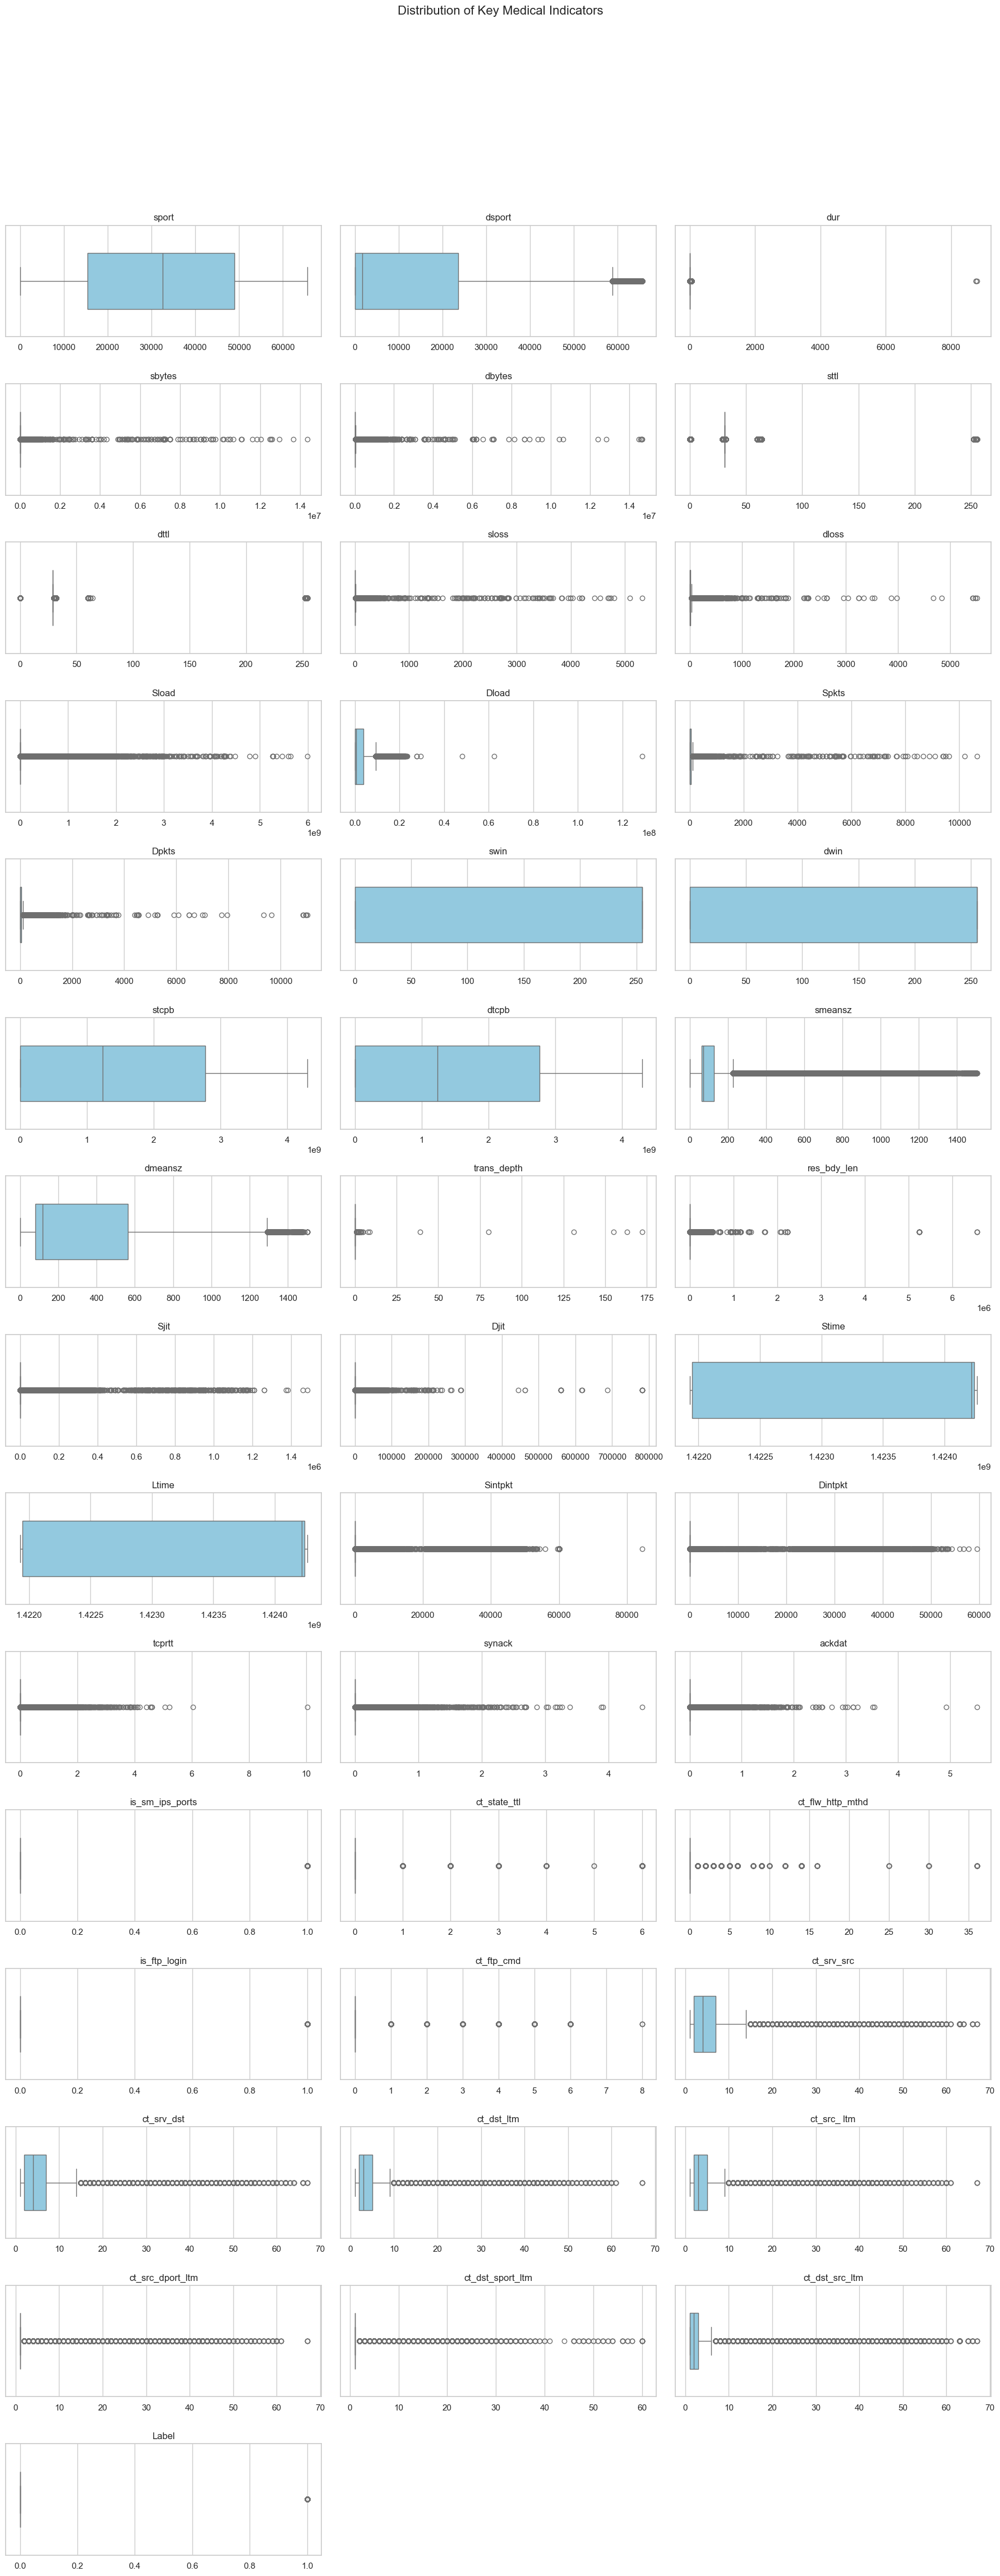

In [87]:
import math

num_columns = len(numerical_columns)

num_cols = 3  # Fixed number of columns
num_rows = math.ceil(num_columns / num_cols)  # Calculate rows needed

plt.figure(figsize=(18, num_rows * 3))

sns.set_palette("husl")
sns.set(style="whitegrid")

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col], color='skyblue', width=0.5)
    plt.title(col)
    plt.xlabel("")

plt.suptitle("Distribution of Key Medical Indicators", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### Handling Outliers in Numerical Columns

This section focuses on handling outliers in numerical columns. Outliers are values that deviate significantly from other observations in the data. These extreme values can be adjusted to prevent them from skewing statistical analyses or model performance.

- **Steps**:
  - Define a list of numerical columns excluding certain ones.
  - For each numerical column:
    - Calculate the median, lower bound, and upper bound for outlier detection using the interquartile range (IQR) method.
    - Replace values outside the bounds with the median of the column.

- **Purpose**: The goal is to handle outliers by replacing extreme values with the median, which reduces their impact while maintaining data integrity.


In [88]:
# Extract numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Columns to exclude
exclude_columns = ['sport', 'swim', 'dwim', 'stcpb', 'dtcpb', 'Stime', 'Ltime']

# Filter out the columns to exclude
numerical_columns = [col for col in numerical_columns if col not in exclude_columns]

In [89]:
for col in numerical_columns:
    median_value = df[col].median()
    lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
    df[col] = df[col].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

## 2. Visualising Data Distribution and Skewness

#### Visualizing Distributions and Skewness of Numerical Features

This section generates histograms with density plots for each numerical feature. It also calculates and displays the skewness of each feature to understand the asymmetry of the distribution.

- **Steps**:
  - Set up a grid of subplots to display histograms for all numerical features.
  - For each feature:
    - Create a histogram with a kernel density estimate (KDE) overlay.
    - Display the skewness of the distribution on the plot.
  - Remove any empty subplots if the number of features is odd.

- **Purpose**: To visualize the distribution of numerical features, assess their skewness, and identify any potential patterns or issues with data symmetry.

**|Skewness| < 1:** The distribution is approximately symmetric.
**|Skewness| > 1:** The distribution is highly skewed.
**|Skewness| between 1 and 2:** Moderately skewed distribution.

C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\1370541315.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(df[col].dropna())
C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\1370541315.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(df[col].dropna())
C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\1370541315.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(df[col].dropna())
C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\1370541315.py:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs

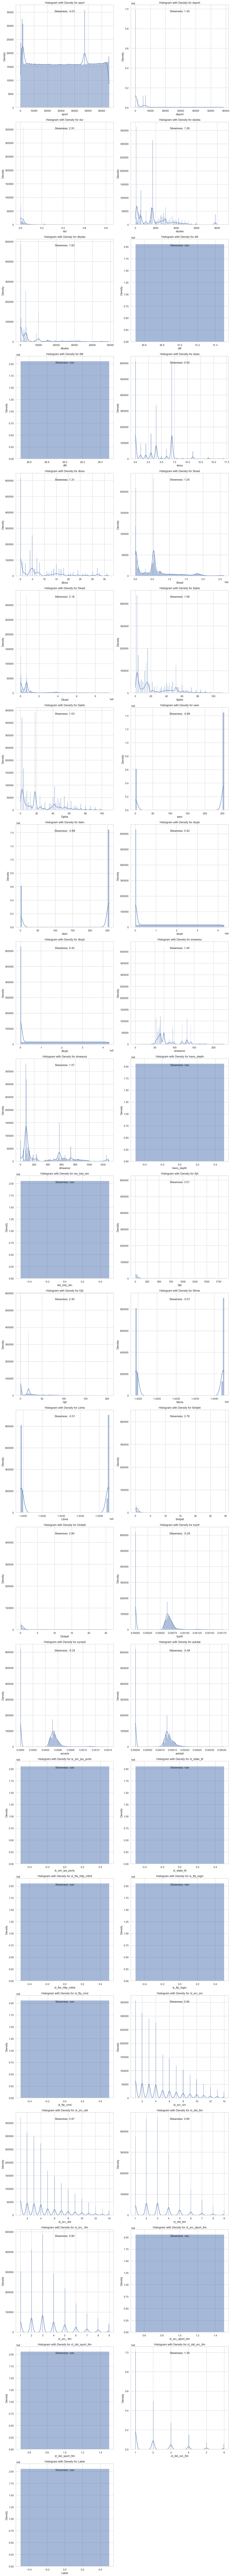

In [90]:
numerical_features = df.select_dtypes(include=['number']).columns
num_plots = len(numerical_features)
num_rows = (num_plots + 1) // 2  # Ensure enough rows to accommodate all features
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14, 7*num_rows))

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram with Density for {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

    skewness = skew(df[col].dropna())
    axes[i].text(0.5, 0.95, f'Skewness: {skewness:.2f}', horizontalalignment='center', verticalalignment='top', transform=axes[i].transAxes)

if num_plots % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Data Transformation to Handle Skewness

This function applies logarithmic transformations to numerical columns to reduce skewness. Positive skew values are transformed using a logarithmic function, while negative skew values are transformed using an inverse logarithmic function. If the distribution is symmetric (zero skew), no transformation is applied.

- **Steps**:
  - Iterate through all numerical columns in the DataFrame.
  - Calculate the skewness for each column.
  - Apply a logarithmic transformation if the skewness is positive or negative.
  - Columns with zero skewness remain unchanged.

- **Purpose**: The goal is to make the data distribution more symmetric, which can improve the performance of machine learning models that assume normality (such as linear regression or logistic regression).

In [91]:
def transform(X):
    eps = 1e-5
    numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

    for col in numerical_columns:
        skewness = skew(X[col])
        if skewness > 0:
            X[col] = np.log(X[col] + eps)
        elif skewness < 0:
            X[col] = np.log(np.max(X[col] + eps) - X[col] + eps)
        else:
            X[col] = X[col]  # No transformation needed

    return X

In [92]:
transform(df)

C:\Users\kmail\AppData\Local\Temp\ipykernel_12088\207377353.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(X[col])


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,11.068901,149.171.126.6,3.970292,udp,CON,-6.844780,4.882802,5.099866,31.0,...,0.0,1.098616,1.945912,0.000010,1.098616,1.0,1.0,0.000010,normal,0.0
1,59.166.0.0,10.369546,149.171.126.9,6.931472,udp,CON,-3.320272,6.269096,5.717028,31.0,...,0.0,0.693152,1.386297,0.693152,1.098616,1.0,1.0,0.693152,normal,0.0
2,59.166.0.6,11.067747,149.171.126.7,3.970292,udp,CON,-6.786423,4.983607,5.181784,31.0,...,0.0,2.484907,2.079443,0.000010,0.693152,1.0,1.0,0.000010,normal,0.0
3,59.166.0.5,11.033954,149.171.126.5,3.970292,udp,CON,-6.709724,4.882802,5.099866,31.0,...,0.0,1.791761,2.197226,0.000010,0.000010,1.0,1.0,0.000010,normal,0.0
4,59.166.0.3,9.672249,149.171.126.0,3.970292,udp,CON,-6.743089,4.983607,5.181784,31.0,...,0.0,1.945912,2.197226,0.000010,0.000010,1.0,1.0,0.000010,normal,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,59.166.0.1,10.200959,149.171.126.9,4.382027,tcp,CON,-0.570915,7.428927,8.032685,31.0,...,0.0,0.000010,0.000010,1.386297,0.693152,1.0,1.0,0.693152,normal,0.0
2540041,59.166.0.1,10.200959,149.171.126.9,4.382027,tcp,CON,-0.570915,7.428927,8.032685,31.0,...,0.0,0.693152,0.000010,1.386297,0.693152,1.0,1.0,0.693152,normal,0.0
2540042,59.166.0.5,10.387178,149.171.126.7,10.678975,tcp,FIN,-2.438222,5.768321,7.510978,31.0,...,0.0,0.000010,0.693152,1.098616,1.098616,1.0,1.0,1.098616,normal,0.0
2540045,59.166.0.9,10.312347,149.171.126.0,4.382027,tcp,CON,-3.633407,8.159947,8.032685,31.0,...,0.0,0.000010,0.000010,0.693152,1.386297,1.0,1.0,0.693152,normal,0.0


## 3. Visualising Class Distribution

### Pie Chart Visualization for Categorical Column

This function generates a pie chart to visualize the distribution of a categorical column. It helps to understand the relative proportions of each category within the specified column.

- **Steps**:
  - Calculate the value counts of the specified column in the DataFrame.
  - Create a pie chart where each slice represents a category, with the color palette adjusted to differentiate categories.
  - Add a white circle in the center to create a "donut" effect, making the pie chart more visually appealing.

- **Purpose**: To provide a clear and easy-to-understand visualization of the distribution of categories in a column.

In [93]:
def pie_bar_plot(dataFrame, col):
    plt.figure(figsize=(10, 6))

    # Extract value counts for the specified column
    value_counts = dataFrame[col].value_counts().sort_index()

    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=None, autopct="", startangle=90, colors=colors)
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.show()

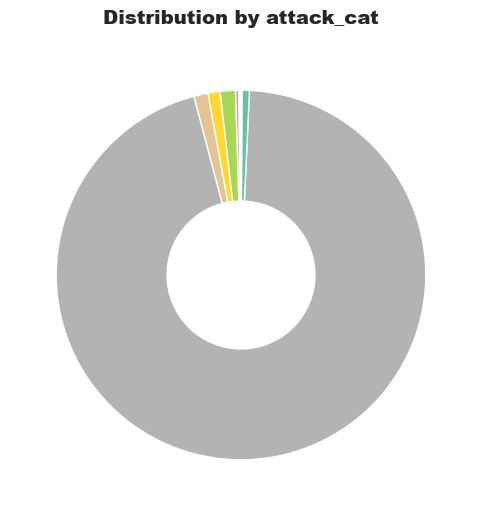

In [94]:
pie_bar_plot(df, 'attack_cat')

In [95]:
# Print class distribution before resampling
print("Before resampling:", df['attack_cat'].value_counts())
print()

Before resampling: attack_cat
normal            1959772
exploits            27599
generic             25378
fuzzers             21795
reconnaissance      13357
dos                  5665
analysis             2184
backdoor             1684
shellcode            1511
backdoors             299
worms                 171
Name: count, dtype: int64



## 4 | Preprocessing

### 1. Featutre Engineering

### Feature Engineering for Network Data

The `generate_features` function creates new features based on the existing columns in the DataFrame. These new features are derived from combinations, ratios, and aggregations of the original network-related columns.

- **Steps**:
  - **Duration**: Calculates the time difference between `Ltime` and `Stime` as the duration.
  - **Ratios**: Creates new features representing ratios between certain columns, such as:
    - `byte_ratio`: The ratio of bytes sent to received.
    - `pkt_ratio`: The ratio of packets sent to received.
    - And others related to load, jitter, and TCP setup.
  - **Aggregates**: Combines relevant columns to create aggregate features like:
    - `total_bytes`, `total_pkts`, `total_load`, and others.
  - **Interactions**: Creates interaction features between pairs of columns that might reveal important relationships.
  - **Statistical Features**: Combines columns to compute summary statistics like the mean packet size and TCP sequence differences.

- **Purpose**: To enrich the dataset with additional features that may help improve the performance of machine learning models by capturing more patterns and relationships within the data.

In [96]:
def generate_features(dataFrame):
    dataFrame['duration'] = dataFrame['Ltime'] - dataFrame['Stime']

    # Ratios
    dataFrame['byte_ratio'] = dataFrame['sbytes'] / (dataFrame['dbytes'] + 1)
    dataFrame['pkt_ratio'] = dataFrame['Spkts'] / (dataFrame['Dpkts'] + 1)
    dataFrame['load_ratio'] = dataFrame['Sload'] / (dataFrame['Dload'] + 1)
    dataFrame['jit_ratio'] = dataFrame['Sjit'] / (dataFrame['Djit'] + 1)
    dataFrame['inter_pkt_ratio'] = dataFrame['Sintpkt'] / (dataFrame['Dintpkt'] + 1)
    dataFrame['tcp_setup_ratio'] = dataFrame['tcprtt'] / (dataFrame['synack'] + dataFrame['ackdat'] + 1)

    # Aggregate Features
    dataFrame['total_bytes'] = dataFrame['sbytes'] + dataFrame['dbytes']
    dataFrame['total_pkts'] = dataFrame['Spkts'] + dataFrame['Dpkts']
    dataFrame['total_load'] = dataFrame['Sload'] + dataFrame['Dload']
    dataFrame['total_jitter'] = dataFrame['Sjit'] + dataFrame['Djit']
    dataFrame['total_inter_pkt'] = dataFrame['Sintpkt'] + dataFrame['Dintpkt']
    dataFrame['total_tcp_setup'] = dataFrame['tcprtt'] + dataFrame['synack'] + dataFrame['ackdat']

    # Interaction Features
    dataFrame['byte_pkt_interaction_src'] = dataFrame['sbytes'] * dataFrame['Spkts']
    dataFrame['byte_pkt_interaction_dst'] = dataFrame['dbytes'] * dataFrame['Dpkts']
    dataFrame['load_jit_interaction_src'] = dataFrame['Sload'] * dataFrame['Sjit']
    dataFrame['load_jit_interaction_dst'] = dataFrame['Dload'] * dataFrame['Djit']
    dataFrame['pkt_jit_interaction_src'] = dataFrame['Spkts'] * dataFrame['Sjit']
    dataFrame['pkt_jit_interaction_dst'] = dataFrame['Dpkts'] * dataFrame['Djit']

    # Statistical Features
    dataFrame['mean_pkt_size'] = dataFrame['smeansz'] + dataFrame['dmeansz']
    dataFrame['tcp_seq_diff'] = dataFrame['stcpb'] - dataFrame['dtcpb']

    return dataFrame

In [97]:
generate_features(df)

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,total_inter_pkt,total_tcp_setup,byte_pkt_interaction_src,byte_pkt_interaction_dst,load_jit_interaction_src,load_jit_interaction_dst,pkt_jit_interaction_src,pkt_jit_interaction_dst,mean_pkt_size,tcp_seq_diff
0,59.166.0.0,11.068901,149.171.126.6,3.970292,udp,CON,-6.844780,4.882802,5.099866,31.0,...,-8.415991,-20.736496,3.384525,3.534984,-151.087699,-153.586746,-7.980209,-7.980209,8.596374,0.000000
1,59.166.0.0,10.369546,149.171.126.9,6.931472,udp,CON,-3.320272,6.269096,5.717028,31.0,...,3.970071,-20.736496,8.690829,7.925498,26.081937,25.650686,3.176876,3.283624,9.213535,0.000000
2,59.166.0.6,11.067747,149.171.126.7,3.970292,udp,CON,-6.786423,4.983607,5.181784,31.0,...,-8.415991,-20.736496,3.454398,3.591765,-151.570206,-153.851802,-7.980209,-7.980209,8.779096,0.000000
3,59.166.0.5,11.033954,149.171.126.5,3.970292,udp,CON,-6.709724,4.882802,5.099866,31.0,...,-7.414307,-20.736496,3.384525,3.534984,-149.519031,-152.018078,-7.980209,-7.980209,8.596374,0.000000
4,59.166.0.3,9.672249,149.171.126.0,3.970292,udp,CON,-6.743089,4.983607,5.181784,31.0,...,-11.102135,-20.736496,3.454398,3.591765,-151.066938,-153.348535,-7.980209,-7.980209,8.779096,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540039,59.166.0.1,10.200959,149.171.126.9,4.382027,tcp,CON,-0.570915,7.428927,8.032685,31.0,...,0.825385,-22.114339,20.597364,23.217450,58.032206,56.964353,13.187438,12.274529,8.751158,-0.006232
2540041,59.166.0.1,10.200959,149.171.126.9,4.382027,tcp,CON,-0.570915,7.428927,8.032685,31.0,...,0.825385,-22.114339,20.597364,23.217450,58.032206,56.964353,13.187438,12.274529,8.751158,-0.006232
2540042,59.166.0.5,10.387178,149.171.126.7,10.678975,tcp,FIN,-2.438222,5.768321,7.510978,31.0,...,5.374261,-22.000399,10.335453,15.618649,71.821851,40.497088,12.735009,7.079242,9.404014,2.899229
2540045,59.166.0.9,10.312347,149.171.126.0,4.382027,tcp,CON,-3.633407,8.159947,8.032685,31.0,...,2.669550,-22.136211,33.133000,23.217450,32.516671,39.041817,13.996526,8.483357,8.856519,-0.979905


In [98]:
# Drop the specified columns from both train_df and test_df
columns_to_drop = ['sport', 'dsport', 'proto','srcip', 'dstip','state', 'service']
df.drop(columns=columns_to_drop, inplace=True)

In [99]:
#Checking the categorical columns
cat_columns = df.select_dtypes(include=['O']).columns.tolist()
cat_columns

['attack_cat']

### 2. Target feature Encoding

In [100]:
label_encoder = LabelEncoder()
ohe = OneHotEncoder()

In [101]:
df['attack_cat'] = label_encoder.fit_transform(df['attack_cat'])

In [102]:
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Mapping:")
print(label_mapping)

Label Mapping:
{'analysis': np.int64(0), 'backdoor': np.int64(1), 'backdoors': np.int64(2), 'dos': np.int64(3), 'exploits': np.int64(4), 'fuzzers': np.int64(5), 'generic': np.int64(6), 'normal': np.int64(7), 'reconnaissance': np.int64(8), 'shellcode': np.int64(9), 'worms': np.int64(10)}


### 3. checking Highly Correlated Features

<Axes: title={'center': 'Correlation Plot'}>

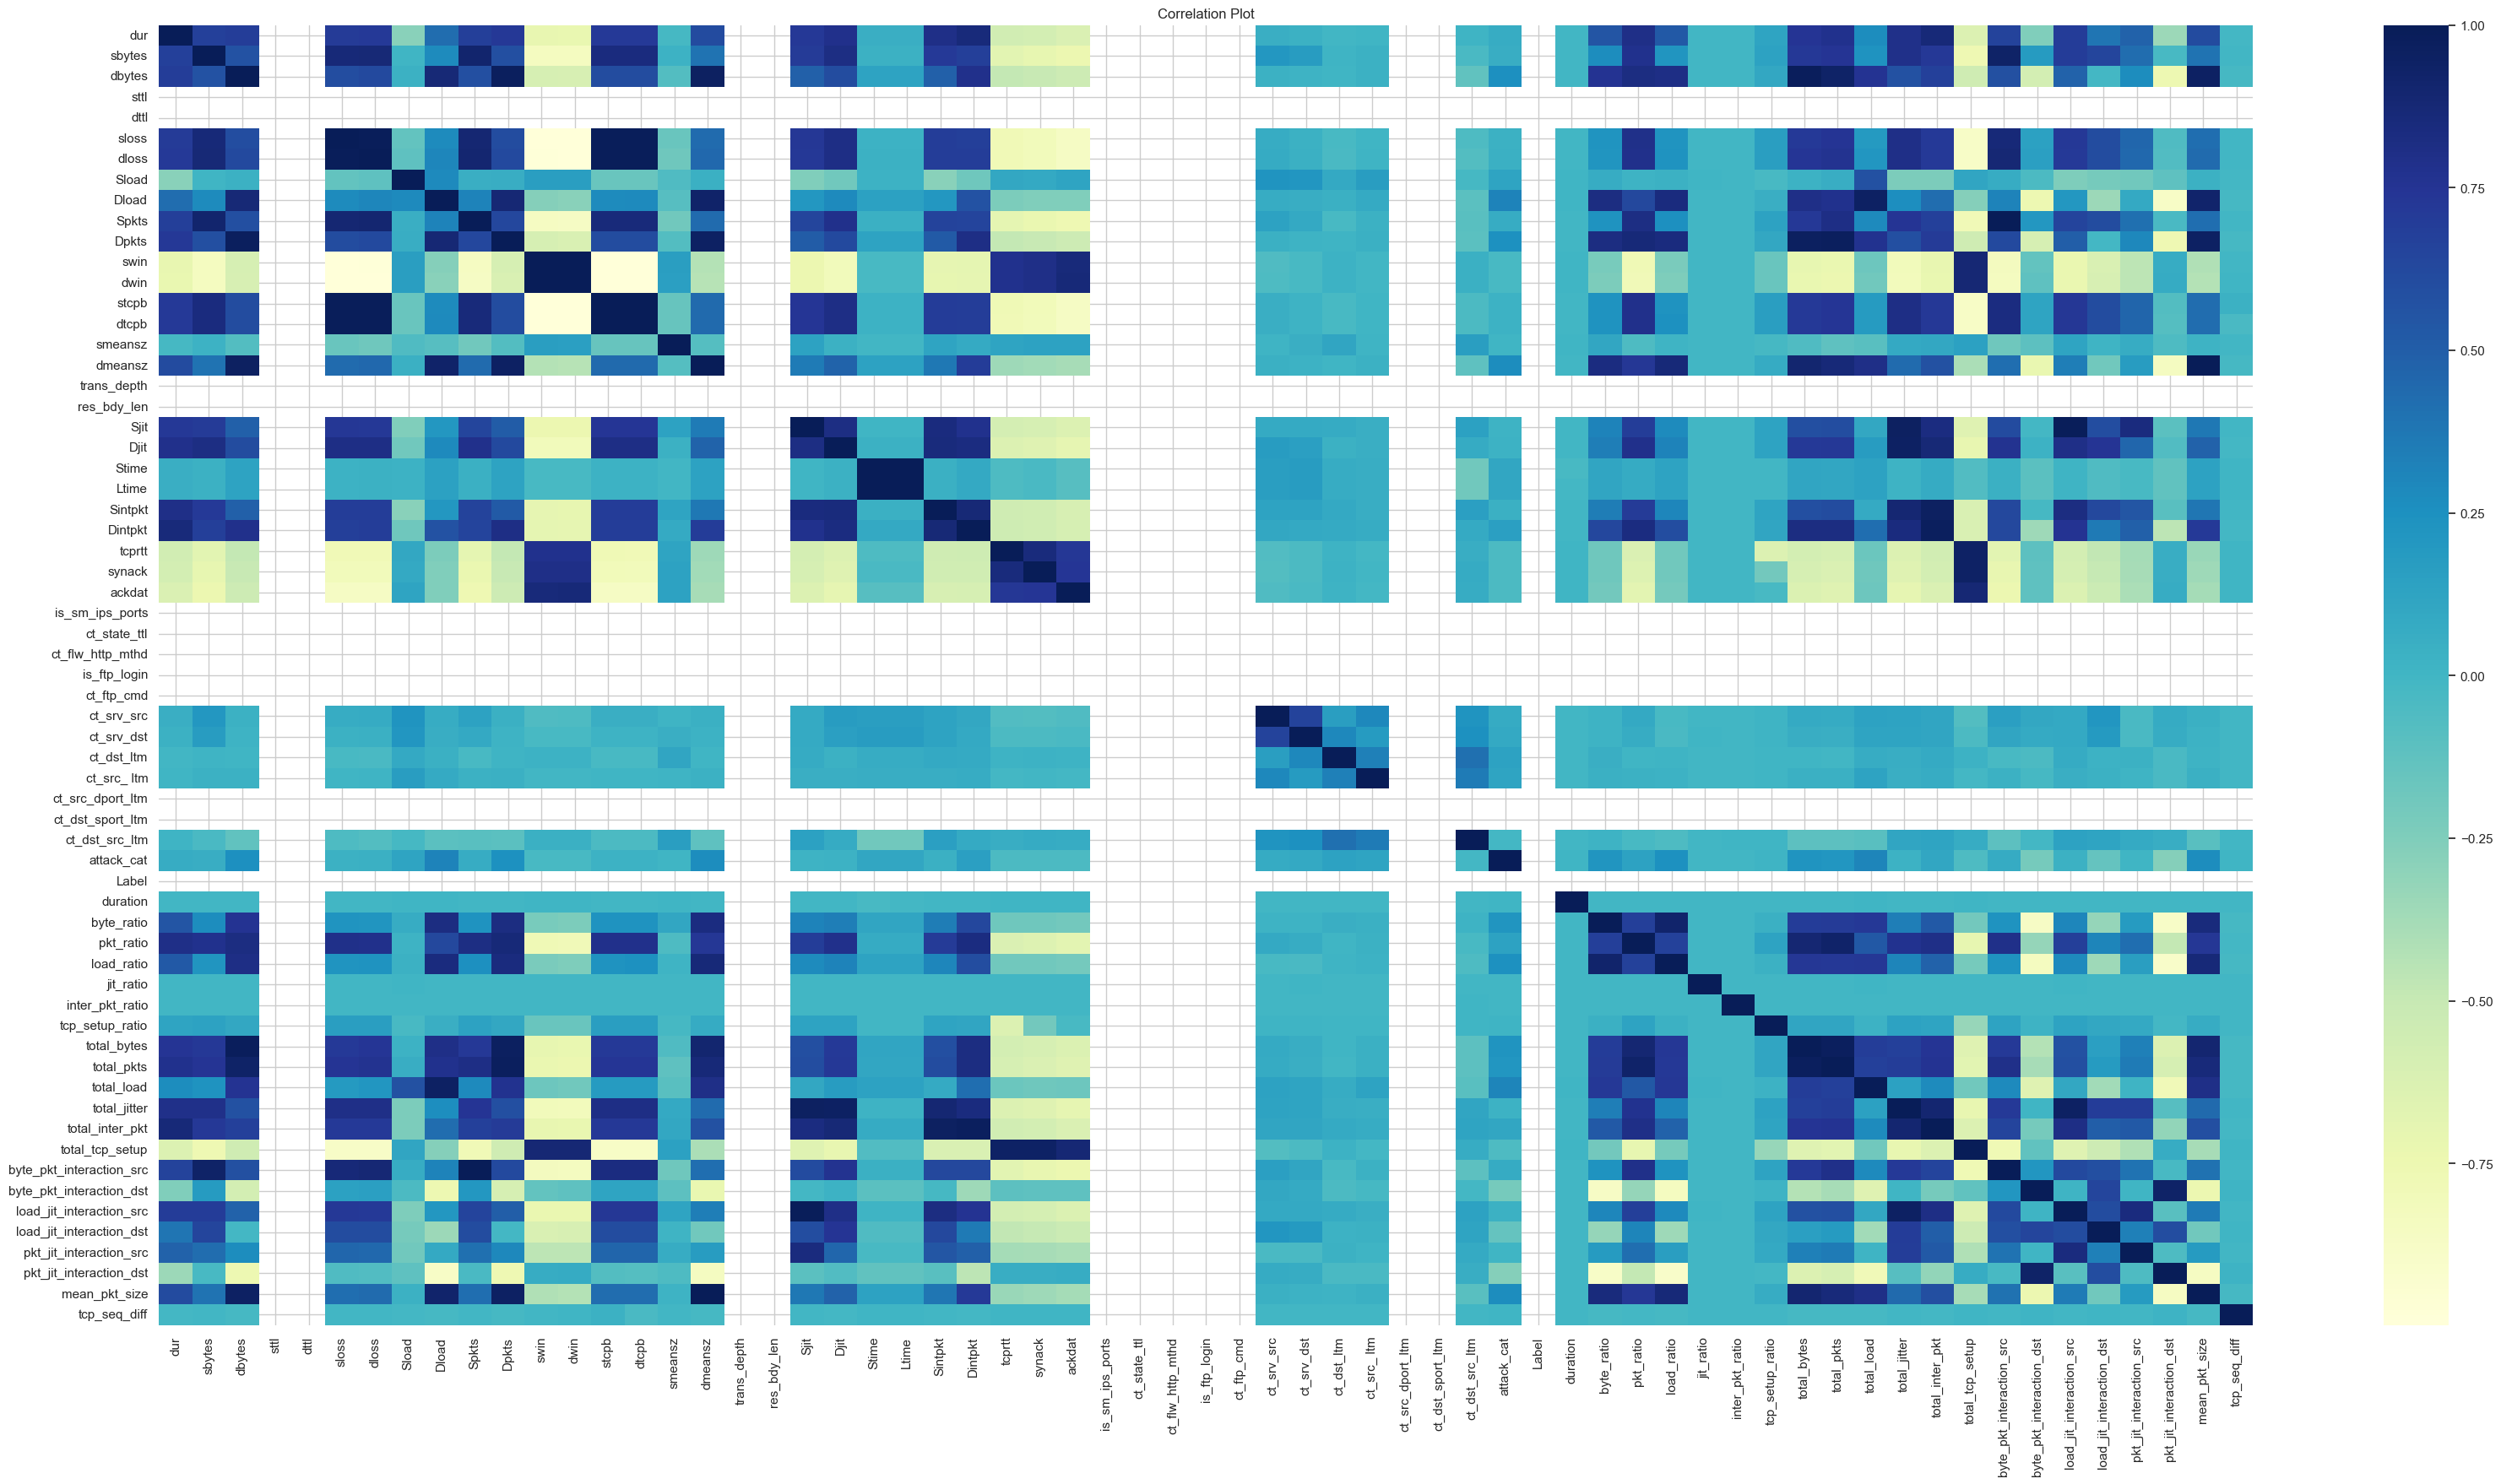

In [103]:
plt.figure(figsize=(40,20))
plt.title("Correlation Plot")
sns.heatmap(df.corr(),cmap='YlGnBu')

In [104]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to identify the features with a correlation coefficient greater than or equal to 0.75
high_correlation_mask = correlation_matrix >= 0.75

# Identify and list the highly correlated features
highly_correlated_features = []

for feature in high_correlation_mask.columns:
    correlated_with = high_correlation_mask.index[high_correlation_mask[feature]].tolist()
    for correlated_feature in correlated_with:
        if feature != correlated_feature and (correlated_feature, feature) not in highly_correlated_features:
            highly_correlated_features.append((feature, correlated_feature))

# Print the highly correlated features
print("Highly correlated features:")
for feature1, feature2 in highly_correlated_features:
    print(f"{feature1} and {feature2}")

Highly correlated features:
dur and Djit
dur and Sintpkt
dur and Dintpkt
dur and pkt_ratio
dur and total_pkts
dur and total_jitter
dur and total_inter_pkt
sbytes and sloss
sbytes and dloss
sbytes and Spkts
sbytes and stcpb
sbytes and dtcpb
sbytes and Djit
sbytes and pkt_ratio
sbytes and total_jitter
sbytes and byte_pkt_interaction_src
dbytes and Dload
dbytes and Dpkts
dbytes and dmeansz
dbytes and Dintpkt
dbytes and byte_ratio
dbytes and pkt_ratio
dbytes and load_ratio
dbytes and total_bytes
dbytes and total_pkts
dbytes and total_load
dbytes and mean_pkt_size
sloss and dloss
sloss and Spkts
sloss and stcpb
sloss and dtcpb
sloss and Djit
sloss and pkt_ratio
sloss and total_jitter
sloss and byte_pkt_interaction_src
dloss and Spkts
dloss and stcpb
dloss and dtcpb
dloss and Djit
dloss and pkt_ratio
dloss and total_pkts
dloss and total_jitter
dloss and byte_pkt_interaction_src
Dload and Dpkts
Dload and dmeansz
Dload and byte_ratio
Dload and load_ratio
Dload and total_bytes
Dload and total_p

In [105]:
# Create a set of features to drop
features_to_drop = set()

# Iterate over the highly correlated features and add one of each pair to the drop list
for feature1, feature2 in highly_correlated_features:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # You can choose feature1 or feature2 to drop

# Drop the features from the DataFrame
df = df.drop(columns=features_to_drop)

# Print the remaining features
print("Remaining features after dropping highly correlated ones:")
print(df.columns)

Remaining features after dropping highly correlated ones:
Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'Sload', 'swin', 'smeansz',
       'trans_depth', 'res_bdy_len', 'Sjit', 'Stime', 'is_sm_ips_ports',
       'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'attack_cat',
       'Label', 'duration', 'jit_ratio', 'inter_pkt_ratio', 'tcp_setup_ratio',
       'byte_pkt_interaction_dst', 'load_jit_interaction_dst', 'tcp_seq_diff'],
      dtype='object')


### 4. Splitting the features in dependent and independent features

In [106]:
x = df.drop(['attack_cat'], axis=1)
y = df[['attack_cat']]

### 5. Applying SMOTE to balance the unbalanced data

In [107]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import pandas as pd

# Define the desired number of samples for each class
desired_count = 15000

# Define the oversampling strategy for SMOTE
oversample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] < desired_count}

# Define the undersampling strategy for RandomUnderSampler
undersample_strategy = {i: desired_count for i in range(len(y.value_counts())) if y.value_counts()[i] > desired_count}

# Create the SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy=oversample_strategy)
undersample = RandomUnderSampler(sampling_strategy=undersample_strategy)

# Combine SMOTE and RandomUnderSampler in a pipeline
pipeline = Pipeline(steps=[('smote', smote), ('undersample', undersample)])

# Print class distribution before resampling
print("Before resampling:", y.value_counts())
print()

# Apply the pipeline to resample the dataset
x_resampled, y_resampled = pipeline.fit_resample(x, y)

# Print class distribution after resampling
print("After resampling:", y_resampled.value_counts())

Before resampling: attack_cat
7             1959772
4               27599
6               25378
5               21795
8               13357
3                5665
0                2184
1                1684
9                1511
2                 299
10                171
Name: count, dtype: int64

After resampling: attack_cat
0             15000
1             15000
2             15000
3             15000
4             15000
5             15000
6             15000
7             15000
8             15000
9             15000
10            15000
Name: count, dtype: int64


In [108]:
x = x_resampled
y = y_resampled

### 6. Checking Feature Importance

In [109]:
discrete_features = x.dtypes == int

def mi_score_maker(x,y,discrete_features):
    scores = mutual_info_regression(x,y,discrete_features=discrete_features)
    dataFrame = pd.DataFrame({
        'Features':x.columns,
        'Scores':scores
    })
    dataFrame = dataFrame.sort_values(['Scores'],ascending=False).reset_index(drop=True)
    return dataFrame

In [110]:
mi_scores = mi_score_maker(x,y.astype('float64'),discrete_features)

mi_scores

,Features,Scores
0,sbytes,1.308999
1,smeansz,1.065110
2,byte_pkt_interaction_dst,0.756343
3,dbytes,0.735206
4,duration,0.673472
5,Stime,0.599048
6,inter_pkt_ratio,0.564682
7,dur,0.518184
8,load_jit_interaction_dst,0.476535
9,ct_srv_dst,0.474276


In [111]:
# Filter features with scores less than 0.001285
low_score_features = mi_scores[mi_scores['Scores'] < 0.01]

# Extract the feature names
low_score_feature_names = low_score_features['Features'].tolist()

# Print the list of low score feature names
low_score_feature_names

['trans_depth',
 'ct_flw_http_mthd',
 'ct_dst_sport_ltm',
 'ct_ftp_cmd',
 'sttl',
 'ct_state_ttl',
 'Label',
 'is_sm_ips_ports',
 'is_ftp_login',
 'res_bdy_len',
 'dttl',
 'ct_src_dport_ltm']

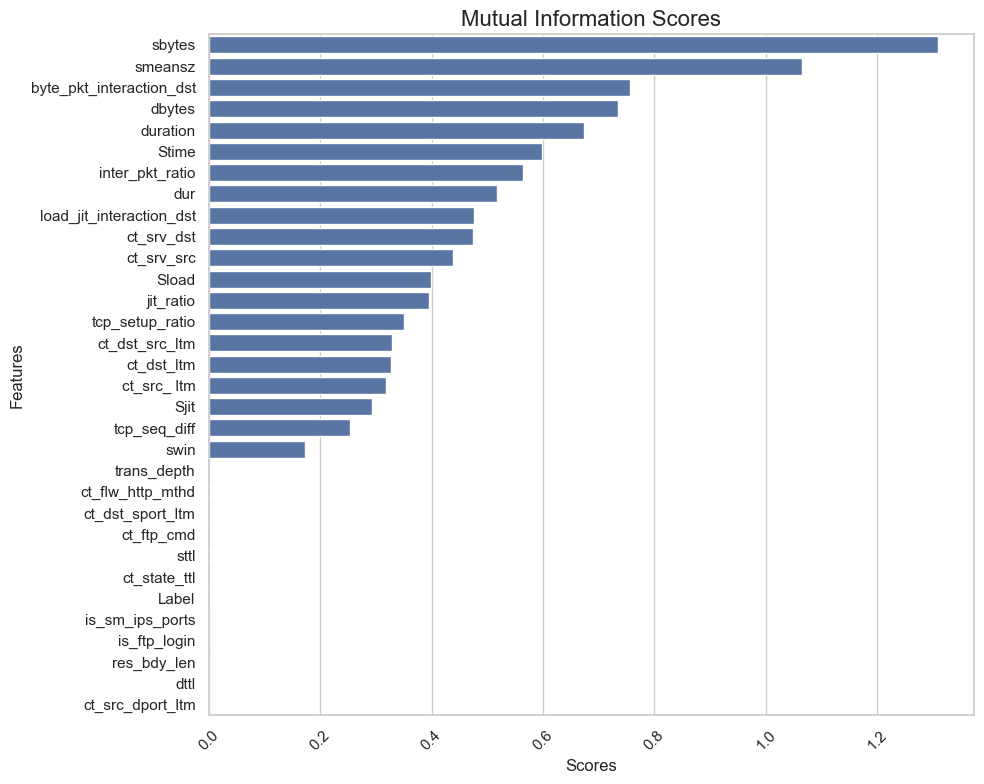

In [112]:
plt.figure(figsize=(10, 8))

# Create the barplot
sns.barplot(x='Scores', y='Features', data=mi_scores)

# Add a title
plt.title("Mutual Information Scores", fontsize=16)

# Rotate the y-axis labels (if needed)
plt.yticks(rotation=0)

# Rotate the x-axis labels (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()


In [113]:
x.drop(low_score_feature_names,axis=1, inplace = True)

### 7.Feature Scaling

In [114]:
scaler = StandardScaler()

In [115]:
x_scaled = scaler.fit_transform(x)

### 8. Checking Variance captured by features

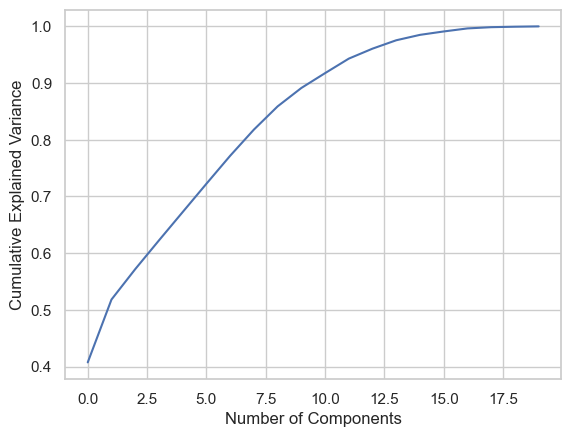

In [116]:
pca = PCA()
pca.fit(x_scaled)  # X_train is your training data
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

### 9. Dividing in train-test-split

In [117]:
x_train_scaled, x_test_scaled, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### 10. Supervised ML modeling: Random Forest Model

In [118]:
# Random Forest Classifier with predefined parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Fit the Random Forest model to the scaled training data
rf_model.fit(x_train_scaled, y_train.to_numpy().ravel())

# Predict on the test data
rf_y_pred = rf_model.predict(x_test_scaled)

# Performance metrics for Random Forest without cross-validation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.47      0.47      2895
           1       0.53      0.61      0.57      2924
           2       0.86      0.94      0.90      3064
           3       0.61      0.50      0.55      3000
           4       0.77      0.73      0.75      3032
           5       0.87      0.88      0.88      2942
           6       0.94      0.85      0.89      3035
           7       1.00      0.99      0.99      3040
           8       0.84      0.81      0.83      3060
           9       0.89      0.97      0.93      3017
          10       0.98      1.00      0.99      2991

    accuracy                           0.80     33000
   macro avg       0.80      0.80      0.80     33000
weighted avg       0.80      0.80      0.80     33000

Random Forest Accuracy: 0.7981818181818182


### 11. Supervised ML modeling: SVM

In [119]:
# Suppress DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Support Vector Machine Classifier with default parameters
svm_model = SVC(random_state=42)

# Fit the model on the training data
svm_model.fit(x_train_scaled, y_train.to_numpy().ravel())

# Make predictions on the test set
svm_y_pred = svm_model.predict(x_test_scaled)

# Performance metrics for SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      2895
           1       0.43      0.77      0.55      2924
           2       0.80      0.98      0.88      3064
           3       0.45      0.04      0.07      3000
           4       0.49      0.68      0.57      3032
           5       0.82      0.74      0.77      2942
           6       0.97      0.77      0.86      3035
           7       0.96      0.94      0.95      3040
           8       0.66      0.70      0.68      3060
           9       0.71      0.63      0.67      3017
          10       0.81      0.96      0.88      2991

    accuracy                           0.69     33000
   macro avg       0.69      0.69      0.66     33000
weighted avg       0.69      0.69      0.66     33000

SVM Accuracy: 0.6893030303030303
